### MCM Monte Carlo Methode
--------------------------------
GP, BC - Radiative Transfer with Multiple Scattering

by Velibor Pejcic (velibor@uni-bonn.de)


In [1]:
import atradlib as ar

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Test atmospheric conditions with MCM 
------------------------------
- Cloud vertical extension: $1000m$
- Volumenextinctionscoef.: $0.01 m^{-1}$
- g:$0.95$
- Single scattering albedo: $0.99$
- Angle of incoming radiation: $30^\circ$

In [3]:
%%time
# N Photons
p = 1000

# Cloud optical thikness
beta=0.01

# Height
H=1000

# Aysmetrie parameter
g = 0.95

# Singlescattering albedo
ssa = 0.99

# Incidence angle
theta = np.deg2rad(30)

coords, tran, refl, abso = ar.MCM(H=H,
                               photons=p,
                               beta=beta,
                               ssalbedo=ssa,
                               g=g,
                               theta=theta,
                               phi=np.deg2rad(0))



CPU times: user 1.46 s, sys: 567 ms, total: 2.03 s
Wall time: 2.03 s


In [4]:
optth = H*beta
print(f"Optical thikness: {optth}")


Optical thikness: 10.0


In [5]:
# Two Stream approximation
tsa_r = ar.tsa_r(g, optth, ssa)
tsa_t = ar.tsa_t(g, optth, ssa)
tsa_a = 1 - (tsa_r+tsa_t)

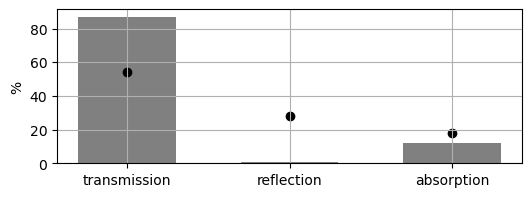

In [6]:
plt.figure(figsize=(6,2))
plt.bar(['transmission', 'reflection', 'absorption'],
        [1e2*(tran/p), 1e2*(refl/p),1e2*(abso/p)],
        width=0.6,
        color='gray'
       )
plt.ylabel("%")
plt.grid()
plt.scatter([0,1,2],
            [1e2*tsa_t, 1e2*tsa_r, 1e2*tsa_a],
           color='black')

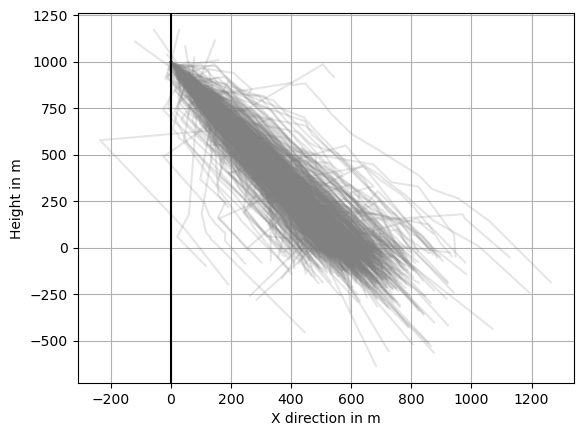

CPU times: user 3.16 s, sys: 2.17 s, total: 5.32 s
Wall time: 4.94 s


In [7]:
%%time
for i in range(len(coords)):
    plt.plot(coords[i][:,0], coords[i][:,2], color='gray', alpha=0.2)
plt.grid()   

plt.xlabel('X direction in m')
plt.ylabel('Height in m')
plt.axvline(0, color='black')
plt.show()


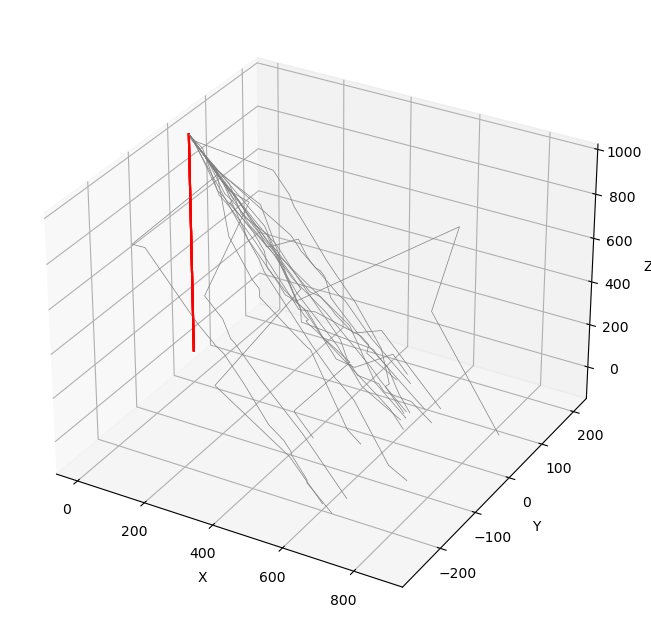

Only 20 Photons used!
CPU times: user 8.58 s, sys: 29.5 s, total: 38.1 s
Wall time: 4.87 s


In [8]:
%%time

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

ff = 20

max_n_photon = 20

for j in range(max_n_photon):
    ### Nur bei 3d notwendig
    ax.plot(coords[j][:,0],
            coords[j][:,1],
            coords[j][:,2],
            color='gray',
            lw=0.5)
    
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.plot([0,0], [0,0], [H,0], color='red', alpha=0.3)
    
    
    plt.grid()

plt.show()
print(f'Only {max_n_photon} Photons used!')

In [9]:
tsa_a

0.17861048298408733